![plebiscitonacional2020](https://koolstreaming.cl/wp-content/uploads/2020/02/pantallas_1024x768-01-e1577722740408.png)

In [ ]:
pip install tweepy

In [ ]:
pip install wordcloud

In [ ]:
pip install nltk

In [9]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df_dia = pd.read_csv('tweets_dia.csv', sep=';,;')
df_noche = pd.read_csv('tweets_noche.csv', sep=';,;')

In [11]:
df_dia.head(10)

,created_at,full_text,user_name,user_screen_name,horario
0,12-10-2020,RT @Verovelasco: Los cien estamos super agrade...,Angel Caído.,Pabloeliecer89,dia
1,12-10-2020,RT @pintanino_: Después de 1 hora y media de b...,El Casta,Macastagnola,dia
2,12-10-2020,RT @cherrerafe: El plebiscito del 25 Octubre s...,Fanny en modo RECHAZO,FannySGomezC,dia
3,12-10-2020,RT @damadefuego25: Muy buen Lunes . comienzo d...,Aurora Araya Márquez #YoApruebo/CC,AuroraArayaM,dia
4,12-10-2020,El #apruebo destruye Chile! Vota #rechazo.,Oscar Martínez,Oscarmartinezam,dia
5,12-10-2020,"RT @AdrianPimiento: El Apruebo está aterrado, ...",Kenny Gonzalez,GONZALEZKENNY15,dia
6,12-10-2020,RT @g2l3: @Silviofilxs Si ganan las encuestas ...,Danice,DanyG94946959,dia
7,12-10-2020,RT @fenix_anita: Chile lamentablemente no se p...,Ramirez pipe,Ramirezpipe3,dia
8,12-10-2020,RT @Elbosquedefern1: De ganar el Rechazo se de...,Sonia,Sonia08148757,dia
9,12-10-2020,RT @marceloandresds: Me tocó presenciar una ma...,Cristina Irribarra,CristinaIrriba1,dia


In [12]:
df_noche.head(10)

,created_at,full_text,user_name,user_screen_name,horario
0,12-10-2020,RT @DamaDelLago38: Recién empieza el día y ya ...,Mabe,manawh,noche
1,12-10-2020,RT @Fenix13482244: Mi padre 85 mi mamá 93 y yo...,Ana Maria,anitamariareye,noche
2,12-10-2020,Vota #Rechazo,Juan Blavi Concha,juanblavi,noche
3,12-10-2020,RT @LustEduardo: La Bancada del F.Amplió expre...,Jesús Adrián Castro Cuevas CABILDANTE ARTIGUISTA.,JeesCas697,noche
4,12-10-2020,RT @ManuelBeltrn14: Total rechazo a la revocat...,Flor María,FlorMar81615791,noche
5,12-10-2020,#EmpoderarFFAAyORDEN #RECHAZOyANULO #Rechazo,Quintus Lentulus Batiatus,Batiato6,noche
6,12-10-2020,@aldocardinali @manawh A buen entendedor pocas...,Gustavo,gustavitalicio,noche
7,12-10-2020,RT @margotaguila: La Institución de Carabinero...,Carolina MorenoCasas,caromore54,noche
8,12-10-2020,Ozuna rechazó en varias ocasiones una colabora...,LaPautaMusical,PautaMusiqal,noche
9,12-10-2020,RT @lionalvawest: @AndresMunday @MauroRenacido...,JSVT,tatovillalobost,noche


In [13]:
txt_dia = ' '.join(df_dia['full_text'])
txt_noche = ' '.join(df_noche['full_text'])

In [14]:
raw_string_dia = txt_dia
raw_string_dia = raw_string_dia.replace('\n',' ').replace("..."," ")

raw_string_noche = txt_noche
raw_string_noche = raw_string_noche.replace('\n',' ').replace("..."," ")

In [15]:
#Limpieza de informacion para el dataset de dia
no_links = re.sub(r'http\S+', '', raw_string_dia) 
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-ZÑÁÉÍÓÚa-zñáéíóú#@ ]+', '', no_unicode)
no_special_characters = re.sub(r'[\.,:]','',no_special_characters)

nltk.download('stopwords')
stopwords = stopwords.words('spanish')

palabras = no_special_characters.split(" ")
palabras = [w for w in palabras if len(w)> 3]

palabras = [w.lower() for w in palabras] 
palabras = [w for w in palabras if w not in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#Limpieza de informacion para el dataset de noche
no_links_noche = re.sub(r'http\S+', '', raw_string_noche) 
no_unicode_noche = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links_noche)
no_special_characters_noche = re.sub('[^A-ZÑÁÉÍÓÚa-zñáéíóú#@ ]+', '', no_unicode_noche)
no_special_characters_noche = re.sub(r'[\.,:]','',no_special_characters_noche)

palabras_noche = no_special_characters_noche.split(" ")
palabras_noche = [w for w in palabras_noche if len(w)> 3]

palabras_noche = [w.lower() for w in palabras_noche] 
palabras_noche = [w for w in palabras_noche if w not in stopwords]

In [17]:
#Dataframe de las palabras de dia
palabras_dia = pd.DataFrame(palabras,columns=['palabras'])
palabras_dia.head()

,palabras
0,@verovelasco
1,cien
2,super
3,agradecidos
4,acompañantes


In [18]:
#Dataframe de las palabras de noche
palabras_noche = pd.DataFrame(palabras_noche,columns=['palabras'])
palabras_noche.head()

,palabras
0,@damadellago
1,recién
2,empieza
3,indigesto
4,frase


In [19]:
print('N° Palabras en el día: '+str(palabras_dia.palabras.count()))
print('N° Palabras únicas en el día: '+str(palabras_dia.palabras.nunique()))
print('\n\nN° Palabras en la noche: '+str(palabras_noche.palabras.count()))
print('N° Palabras únicas en la noche: '+str(palabras_noche.palabras.nunique()))

N° Palabras en el día: 377238
N° Palabras únicas en el día: 37243


N° Palabras en la noche: 582900
N° Palabras únicas en la noche: 45009


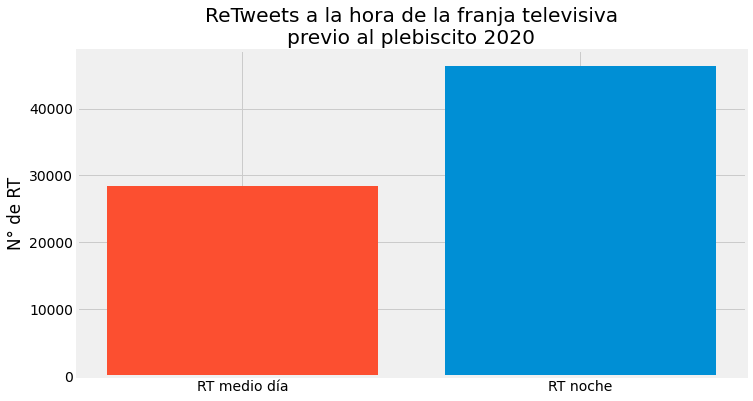

In [20]:
#Numero de RT en total (en 11 dias)
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):  
  x_dia = 1
  y_dia = df_dia['full_text'].str.contains('RT').value_counts()[True]

  x_noche = 2
  y_noche = df_noche['full_text'].str.contains('RT').value_counts()[True]

  plt.bar(x_noche,y_noche,label='RT noche')
  plt.bar(x_dia,y_dia,label='RT dia')

  plt.xticks([1,2],['RT medio día','RT noche'])
  plt.ylabel('N° de RT')
  plt.title('ReTweets a la hora de la franja televisiva\nprevio al plebiscito 2020')
  plt.show()

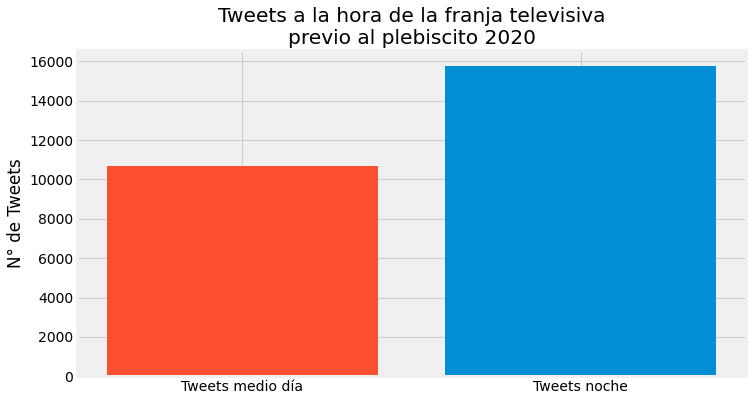

In [21]:
#Numero de tweets en total (en 11 dias)
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):  
  x_dia = 1
  y_dia = df_dia['full_text'].str.contains('RT').value_counts()[False]

  x_noche = 2
  y_noche = df_noche['full_text'].str.contains('RT').value_counts()[False]

  plt.bar(x_noche,y_noche,label='Tweets noche')
  plt.bar(x_dia,y_dia,label='Tweets día')

  plt.xticks([1,2],['Tweets medio día','Tweets noche'])
  plt.ylabel('N° de Tweets')
  plt.title('Tweets a la hora de la franja televisiva\nprevio al plebiscito 2020')
  plt.show()

In [22]:
#Numero de Tweets / RT a la hora de la franja televisiva en el dia
dist_dia = pd.DataFrame(df_dia.groupby(by=['created_at']).count()['full_text'])
dist_dia = dist_dia.drop(['created_at'])

#Numero de Tweets / RT a la hora de la franja televisiva en la noche
dist_noche = pd.DataFrame(df_noche.groupby(by=['created_at']).count()['full_text'])
dist_noche = dist_noche.drop(['created_at'])

In [23]:
#Numero de Tweets por dia
dist_xdia = pd.concat([dist_dia,dist_noche], axis=0).groupby(by=['created_at']).sum()
dist_xdia = dist_xdia.rename(columns={'full_text':'Tweets / RTweets'})
dist_xdia

,Tweets / RTweets
created_at,
12-10-2020,6624
13-10-2020,5861
14-10-2020,4682
15-10-2020,4999
16-10-2020,6368
17-10-2020,8472
18-10-2020,19259
19-10-2020,10186
20-10-2020,14379


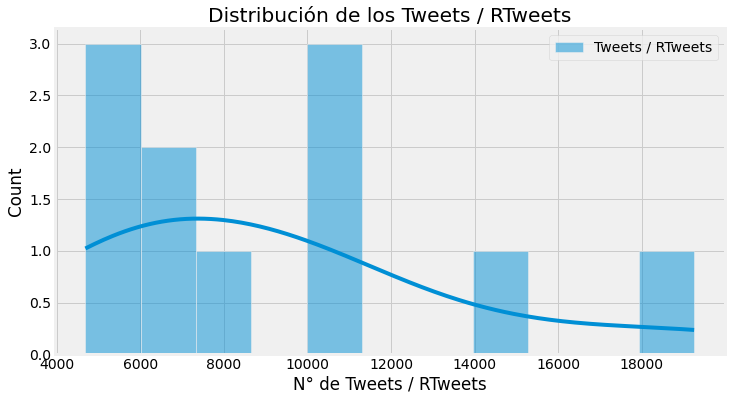

In [24]:
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):  
  #sns.displot(dist_xdia,bins=11)
  sns.histplot(dist_xdia,bins=11, kde=True)
  plt.title('Distribución de los Tweets / RTweets')
  plt.xlabel('N° de Tweets / RTweets')

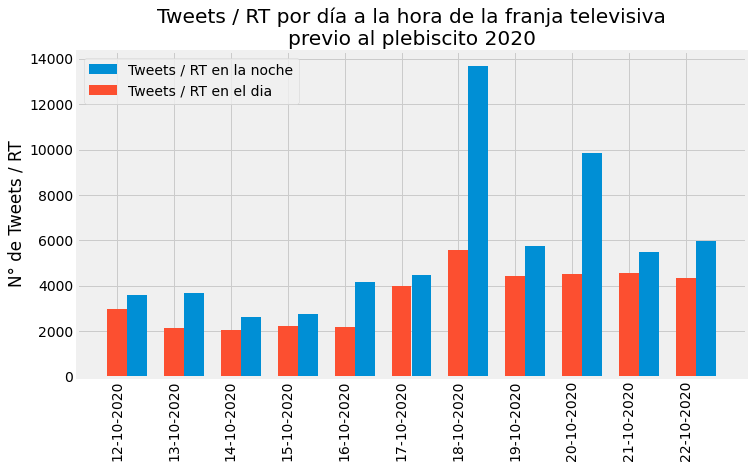

In [25]:
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):  
  fecha = np.arange(12,23)
  n_tweets_dia = dist_dia.full_text.values

  n_tweets_noche = dist_noche.full_text.values

  plt.bar(fecha+0.35,n_tweets_noche,width=0.35,label='Tweets / RT en la noche')
  plt.bar(fecha,n_tweets_dia,width=0.35,label='Tweets / RT en el dia')

  plt.xticks(fecha,dist_dia.index.values,rotation=90)
  plt.ylabel('N° de Tweets / RT')
  plt.title('Tweets / RT por día a la hora de la franja televisiva\nprevio al plebiscito 2020')
  plt.legend(loc="upper left")
  plt.show()

In [26]:
#Numero de RT por dia a la hora de la franja televisiva en la dia
Rt_xdia_dia = pd.DataFrame(df_dia[df_dia['full_text'].str.contains('RT') == True].groupby(by=['created_at']).count()['full_text'])
#Rt_xdia_dia = Rt_xdia_dia.drop(['created_at'])

#Numero de RT por dia a la hora de la franja televisiva en la noche
Rt_xdia_noche = pd.DataFrame(df_noche[df_noche['full_text'].str.contains('RT') == True].groupby(by=['created_at']).count()['full_text'])
#Rt_xdia_noche = Rt_xdia_noche.drop(['created_at'])

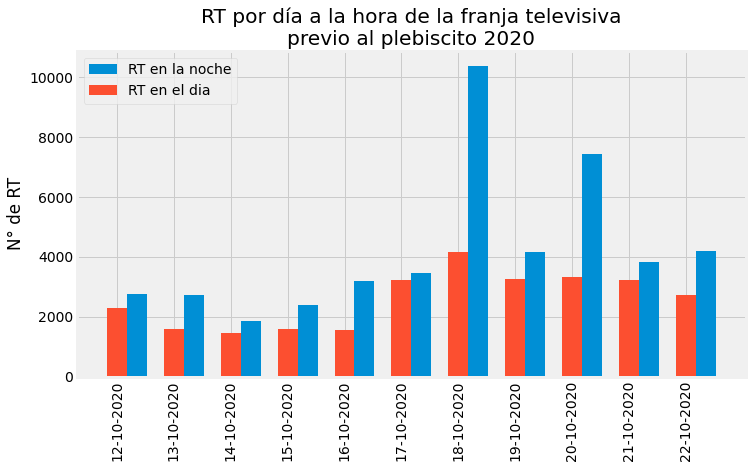

In [27]:
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):  
  n_rt_dia = Rt_xdia_dia.full_text.values

  n_rt_noche = Rt_xdia_noche.full_text.values

  plt.bar(fecha+0.35,n_rt_noche,width=0.35,label='RT en la noche')
  plt.bar(fecha,n_rt_dia,width=0.35,label='RT en el dia')

  plt.xticks(fecha,dist_dia.index.values,rotation=90)
  plt.ylabel('N° de RT')
  plt.title('RT por día a la hora de la franja televisiva\nprevio al plebiscito 2020')
  plt.legend(loc="upper left")
  plt.show()

In [28]:
#Numero de RT por dia a la hora de la franja televisiva en la dia
tweets_xdia_dia = pd.DataFrame(df_dia[df_dia['full_text'].str.contains('RT') == False].groupby(by=['created_at']).count()['full_text'])
tweets_xdia_dia = tweets_xdia_dia.drop(['created_at'])

#Numero de RT por dia a la hora de la franja televisiva en la noche
tweets_xdia_noche = pd.DataFrame(df_noche[df_noche['full_text'].str.contains('RT') == False].groupby(by=['created_at']).count()['full_text'])
tweets_xdia_noche = tweets_xdia_noche.drop(['created_at'])

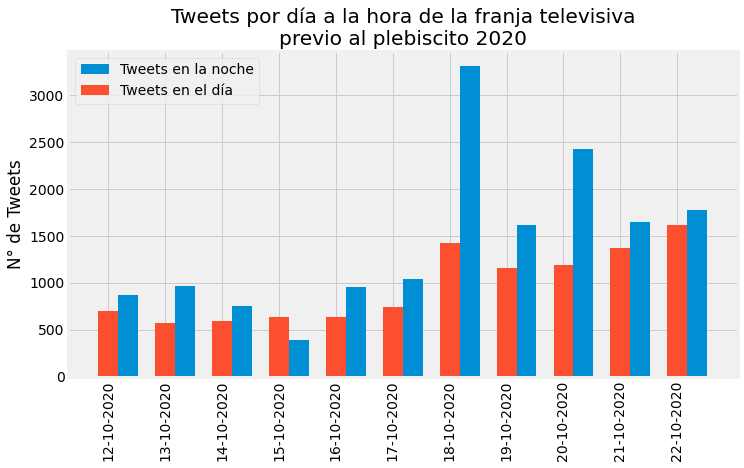

In [29]:
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):  
  n_tweets_dia = tweets_xdia_dia.full_text.values
  n_tweets_noche = tweets_xdia_noche.full_text.values

  plt.bar(fecha+0.35, n_tweets_noche, width=0.35, label='Tweets en la noche')
  plt.bar(fecha, n_tweets_dia, width=0.35, label='Tweets en el día')

  plt.xticks(fecha,dist_dia.index.values,rotation=90)
  plt.ylabel('N° de Tweets')
  plt.title('Tweets por día a la hora de la franja televisiva\nprevio al plebiscito 2020')
  plt.legend(loc="upper left")
  plt.show()

Como se observa, en la última semana hubo un aumento el flujo de Tweets y ReTweets.
<br>

El pick de Tweets y ReTweets se obtuvo el día 18 de octubre. Se debe considerar que ese día se conmemoraba 1 año del estallido social, era de esperar que los Tweets aumentaran. Además en la noche ocurrieron incidentes y que evidentemente se ve reflejado en can cantidad de tweets en la noche de ese día.

In [30]:
n_tweets_dia = []
n_tweets_noche = []

n_tweets_dia.append(len(df_dia[(df_dia['created_at']=='18-10-2020') & (df_dia['full_text'].str.contains('RT') == False) ]['full_text'])) #Numero de Tweets en el dia
n_tweets_dia.append(len(df_noche[(df_noche['created_at']=='18-10-2020') & (df_noche['full_text'].str.contains('RT') == False) ]['full_text'])) #Numero de Tweets en la noche

n_tweets_noche.append(len(df_dia[(df_dia['created_at']=='18-10-2020') & (df_dia['full_text'].str.contains('RT') == True) ]['full_text'])) #Numero de RT en el dia
n_tweets_noche.append(len(df_noche[(df_noche['created_at']=='18-10-2020') & (df_noche['full_text'].str.contains('RT') == True) ]['full_text'])) #Numero de RT en la noche

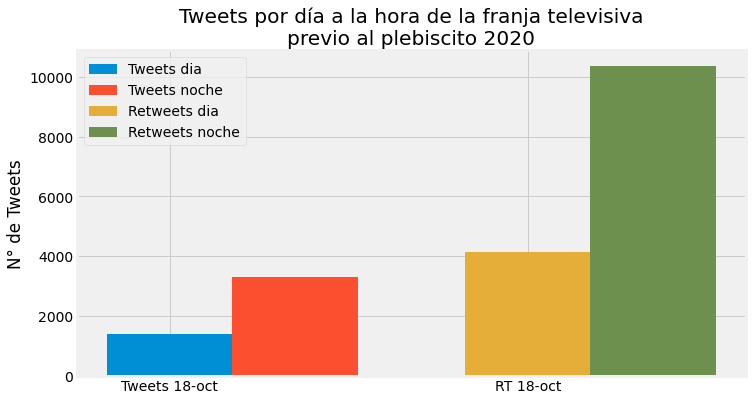

In [48]:
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):
  tweets_retweets_18_oct = np.arange(2)

  plt.bar(tweets_retweets_18_oct[0] , n_tweets_dia[0], width=0.35,label='Tweets dia')
  plt.bar(tweets_retweets_18_oct[0]+0.35 , n_tweets_dia[1], width=0.35,label='Tweets noche')
  plt.bar(tweets_retweets_18_oct[1], n_tweets_noche[0], width=0.35,label='Retweets dia')
  plt.bar(tweets_retweets_18_oct[1]+0.35, n_tweets_noche[1], width=0.35,label='Retweets noche')

  plt.xticks(tweets_retweets_18_oct,['Tweets 18-oct','RT 18-oct'])
  plt.ylabel('N° de Tweets')
  plt.title('Tweets por día a la hora de la franja televisiva\nprevio al plebiscito 2020')
  plt.legend(loc="upper left")
  plt.show()

In [32]:
texto = palabras_dia.palabras.value_counts()
texto_noche = palabras_noche.palabras.value_counts()

In [33]:
numero_Palabras = pd.DataFrame.from_dict(texto)
#numero_Palabras.sort_values(['palabras'],ascending=False,inplace=True)
numero_Palabras_noche = pd.DataFrame.from_dict(texto_noche)

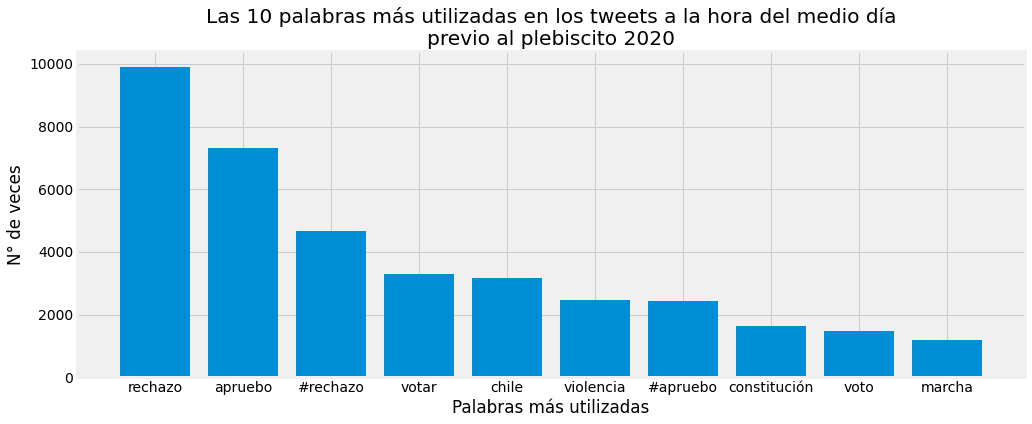

In [34]:
plt.figure(figsize=(17,6))
with plt.style.context('fivethirtyeight'):  
  plt.bar(numero_Palabras.iloc[:10].index,numero_Palabras.iloc[:10,0])
  plt.xlabel('Palabras más utilizadas')
  plt.ylabel('N° de veces')
  plt.title('Las 10 palabras más utilizadas en los tweets a la hora del medio día\nprevio al plebiscito 2020')
  plt.show()

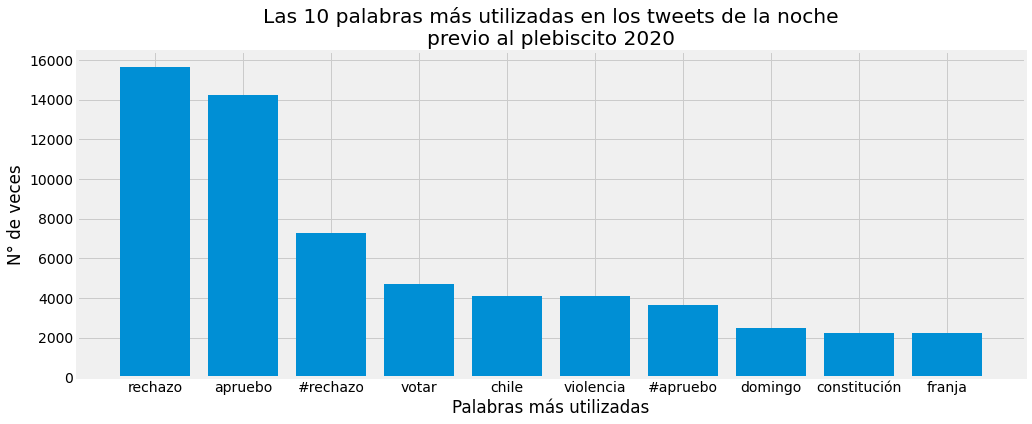

In [35]:
plt.figure(figsize=(17,6))
with plt.style.context('fivethirtyeight'):  
  plt.bar(numero_Palabras_noche.iloc[:10,:].index,numero_Palabras_noche.iloc[:10,0])
  plt.xlabel('Palabras más utilizadas')
  plt.ylabel('N° de veces')
  plt.title('Las 10 palabras más utilizadas en los tweets de la noche\nprevio al plebiscito 2020')
  plt.show()

In [36]:
wc = WordCloud(background_color="black", max_words=200,random_state=1,stopwords=stopwords,repeat=False,width=2000,height=1000,min_font_size=10)
wc.generate_from_frequencies(texto)

wc_noche = WordCloud(background_color="black", max_words=200,random_state=1,stopwords=stopwords,repeat=False,width=2000,height=1000,min_font_size=10)
wc_noche.generate_from_frequencies(texto_noche)

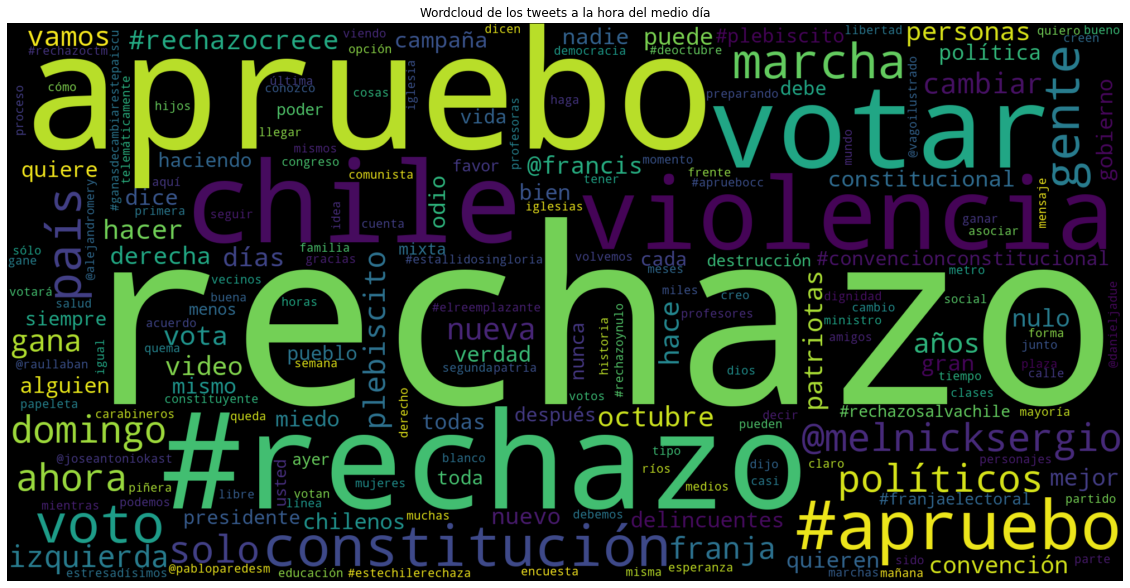

In [37]:
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud de los tweets a la hora del medio día')
plt.show()

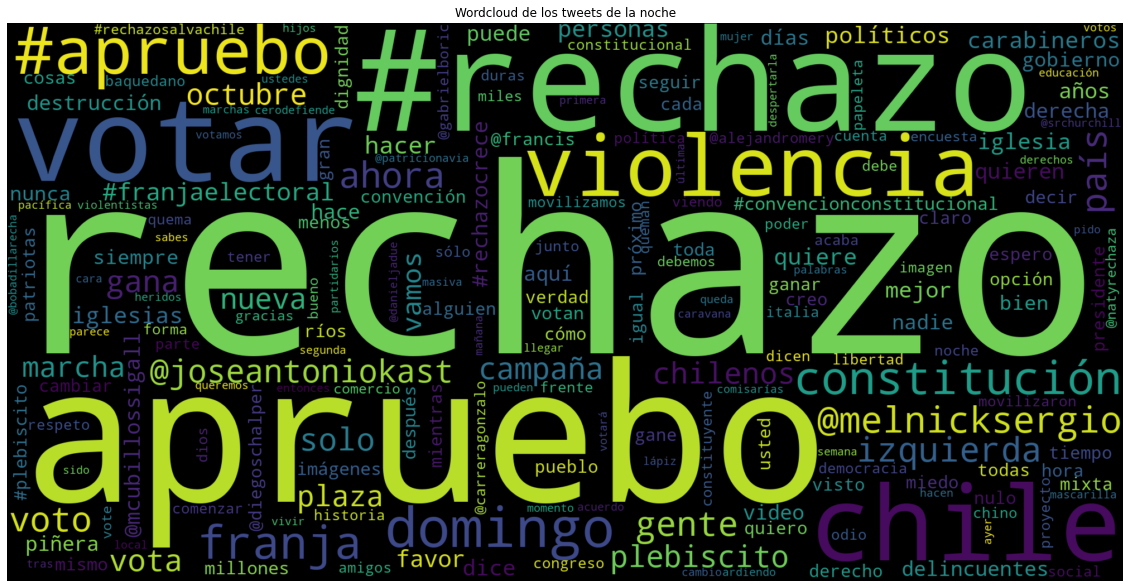

In [38]:
plt.figure(figsize=(20,15))
plt.imshow(wc_noche, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud de los tweets de la noche')
plt.show()